In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
true_state = pd.read_csv("/content/states.csv")
sensor_output = pd.read_csv("/content/sensor_output.csv")

**setup:** System Initialization

In [3]:
#model initialization:
m, k_1, k_2, b, ts = 10, 10, 5, 2, 0.02
#system matrices:
A = np.array([[0, 1, 0],
              [(-(k_1 + k_2)/m), 0, (k_1/m)],
              [(k_1/b), 0, (-k_1/b)]])   ##Jacobian(x) = A##
B = np.array([[0], [1/m], [0]])
C1 = np.array([[1, 0, 0]])
C2 = np.array([[0, 1, 0]])
C3 = np.array([[0, 0, 1]])
Q = np.diag([10, 10, 5])
R1 , R2, R3 = 10, 5, 5
R_vec = np.array([R1, R2, R3])
h = 0.02 #time step
#State Variables:
#x[0] = x1 = potential of spring k2 ///// x[1] = x2 = kinetic energy of mass m
#x[2] = x3 = potential of spring k1
###system state dynamics
def state_dynamics(x): #output : dx = A.x
  p2 = x[0]
  kin = x[1]
  p1 = x[2]
  x_vec = np.array([[p2, kin ,p1]])
  dp2 = kin
  dkin = A[1][0]*p2 + A[1][2]*p1
  dp1 =  A[2][0]*p2 +A[2][2]*p1
  return np.array([dp2, dkin ,dp1])

##One-step Euler Intgrator for discretization
def discretize(x, state_dynamics):
#this def returns the discretized function at each step
    return x + h * state_dynamics(x)
#def state_fin(x, state_dynamics, discretize, omega):
#  return discretize(x, state_dynamics) + omega

In [ ]:
print("Discretization Matrix:")
np.eye(3) + 0.02*A

Discretization Matrix:


array([[ 1.  ,  0.02,  0.  ],
       [-0.03,  1.  ,  0.02],
       [ 0.1 ,  0.  ,  0.9 ]])

**Part B) RMSE Calculations**

In [4]:
#System noise definition
num_of_measurements = 500
omega_1 = np.random.normal(0, 10, 500)
omega_2 = np.random.normal(0, 10, 500)
omega_3 = np.random.normal(0, 5, 500)
omega = np.array([omega_1, omega_2, omega_3]).reshape(500,3)
#measurement noise definition
v1 = np.random.normal(0, 10, 500)
v2 = np.random.normal(0, 5, 500)
v3 = np.random.normal(0, 5, 500)
#adding noise to discretized system:

In [5]:
#system output from true states
y1 = np.array(true_state)[:,0] + v1
y2 = np.array(true_state)[:,1] + v2
y3 = np.array(true_state)[:,2] + v3
#error between actual output(from true states) and sensor outputs
diff11 = y1 - np.array(sensor_output)[:, 0]
diff12 = y1 - np.array(sensor_output)[:, 1]
diff13 = y1 - np.array(sensor_output)[:, 2]
diff21 = y2 - np.array(sensor_output)[:, 0]
diff22 = y2 - np.array(sensor_output)[:, 1]
diff23 = y2 - np.array(sensor_output)[:, 2]
diff31 = y3 - np.array(sensor_output)[:, 0]
diff32 = y3 - np.array(sensor_output)[:, 1]
diff33 = y3 - np.array(sensor_output)[:, 2]
#RMSE
RMSE11 = np.sqrt( 1/500 * np.sum(np.power(diff11, 2)))
RMSE12 = np.sqrt( 1/500 * np.sum(np.power(diff12, 2)))
RMSE13 = np.sqrt( 1/500 * np.sum(np.power(diff13, 2)))
RMSE21 = np.sqrt( 1/500 * np.sum(np.power(diff21, 2)))
RMSE22 = np.sqrt( 1/500 * np.sum(np.power(diff22, 2)))
RMSE23 = np.sqrt( 1/500 * np.sum(np.power(diff23, 2)))
RMSE31 = np.sqrt( 1/500 * np.sum(np.power(diff31, 2)))
RMSE32 = np.sqrt( 1/500 * np.sum(np.power(diff32, 2)))
RMSE33 = np.sqrt( 1/500 * np.sum(np.power(diff33, 2)))
#plotting RMSE table
from prettytable import PrettyTable
table = PrettyTable(["RMSE of sensor i and state j", " Value of RMSE"])
table.add_row(["RMSE11: sesnor 1 and state 1", RMSE11])
table.add_row(["RMSE12: sesnor 1 and state 2", RMSE12])
table.add_row(["RMSE13: sesnor 1 and state 3", RMSE13])
table.add_row(["RMSE21: sesnor 2 and state 1", RMSE21])
table.add_row(["RMSE22: sesnor 2 and state 2", RMSE22])
table.add_row(["RMSE23: sesnor 2 and state 3", RMSE23])
table.add_row(["RMSE31: sesnor 3 and state 1", RMSE31])
table.add_row(["RMSE32: sesnor 3 and state 2", RMSE32])
table.add_row(["RMSE33: sesnor 3 and state 3", RMSE33])
print(table)

+------------------------------+--------------------+
| RMSE of sensor i and state j |    Value of RMSE   |
+------------------------------+--------------------+
| RMSE11: sesnor 1 and state 1 | 9.917039411175248  |
| RMSE12: sesnor 1 and state 2 | 72.74337504341186  |
| RMSE13: sesnor 1 and state 3 | 15.837618068523822 |
| RMSE21: sesnor 2 and state 1 | 72.64638924496384  |
| RMSE22: sesnor 2 and state 2 | 5.531668047519291  |
| RMSE23: sesnor 2 and state 3 |  77.5027667591782  |
| RMSE31: sesnor 3 and state 1 | 13.34436842671644  |
| RMSE32: sesnor 3 and state 2 | 77.66039709805808  |
| RMSE33: sesnor 3 and state 3 | 5.546788602208176  |
+------------------------------+--------------------+


##**part (c)** EKF // x1

In [6]:
#initialization of state
x0 = np.array([10, 10, 10])
#initialization of error cov
p0 = np.diag([10, 100, 10])

In [7]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)

In [8]:
#EKF StartUp
num_of_iterations = 500
K = []
Rmeasure = np.diag([R1, R2, R3])
K01 = p0 @ C1.T @ np.linalg.inv((C1 @ p0 @ C1.T + R3))
K02 = p0 @ C2.T @ np.linalg.inv((C2 @ p0 @ C2.T + R2))
K03 = p0 @ C3.T @ np.linalg.inv((C3 @ p0 @ C3.T + R3))
K.append(K01) #K0i per problem

In [ ]:
K01, K02, K03

(array([[0.66666667],
        [0.        ],
        [0.        ]]),
 array([[0.        ],
        [0.95238095],
        [0.        ]]),
 array([[0.        ],
        [0.        ],
        [0.66666667]]))

In [65]:
#omega_row = np.array(np.random.normal(0,[10, 10, 5],3))

# omega1 = np.random.normal(0, 10, 1)
# omega2 = np.random.normal(0, 10, 1)
# omega3 = np.random.normal(0, 5, 1)
rmse_pred_x1 = []
rmse_pred_x2 = []
rmse_pred_x3 = []
rmse_cor_x1 = []
rmse_cor_x2 = []
rmse_cor_x3 = []

Xpred1 = discretize(x0, state_dynamics)
Xpred.append(Xpred1)
Ppred1 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred1))
K1 = Ppred1 @ C1.T @ np.linalg.inv((C1 @ Ppred1 @ C1.T + R3))
K.append(np.array([K1]))
Ppred_corrected1 = (np.identity(3) - K1 @ C1) @ Ppred1
Ppred_corrected.append(np.array(Ppred_corrected1))
Xpred_corrected1 = Xpred1 + K1 @ ((np.array(sensor_output)[0,2]) - C1 @Xpred1)
Xpred_corrected.append(Xpred_corrected1)

In [66]:
print("predicted X is", Xpred1)
print("Corrected X is", Xpred_corrected1)

predicted X is [10.2  9.9 10. ]
Corrected X is [-0.54939423  9.9        10.        ]


In [ ]:
rmse_pred1 = []
rmse_cor1 = []
Ppred_old = Ppred_corrected1
Xpred_old = Xpred_corrected1
Ppred_norm = []
Ppred_corrected_norm = []
sense = np.array(sensor_output)[: , 2]
for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  #print(Ppred_new.shape)
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C1.T @ (np.linalg.inv((C1 @ Ppred_new @ C1.T + R3)))
  #print(K_new.shape)
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C1) @ Ppred_new
  #print(Ppred_corrected_new.shape)
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C1 @Xpred_new)
  #print(Xpred_corrected_new.shape)
  rmse_pred = sense[k+1] - C1 @Xpred_new
  rmse_pred1.append(rmse_pred)
  rmse_cor = sense[k+1] - C1 @Xpred_corrected_new
  rmse_cor1.append(rmse_cor)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm.append(np.linalg.norm(Ppred_corrected_new))
  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new


##plots

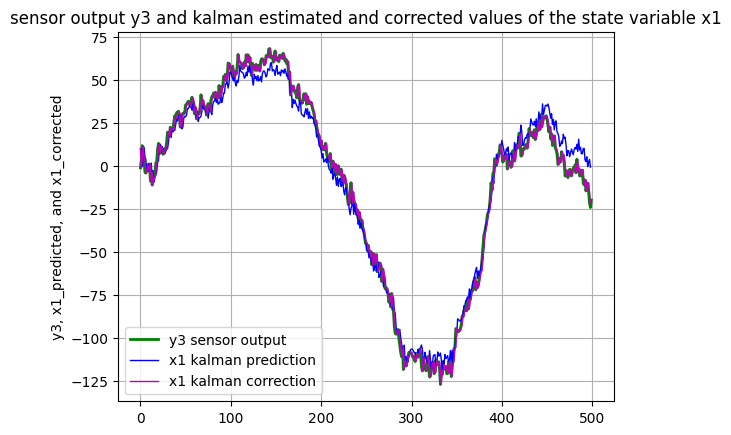

In [ ]:
X1 = [item[0] for item in Xpred]
x1cor = [item[0] for item in Xpred_corrected]
plt.plot(sense, color = 'g', linewidth = '2', label = 'y3 sensor output')
plt.plot(np.array(X1[0:499]), color = 'b', linewidth = '1', label = 'x1 kalman prediction')
plt.plot(np.array(x1cor[0:499]), color = 'm', linewidth = '1', label = 'x1 kalman correction')
plt.ylabel('y3, x1_predicted, and x1_corrected', fontsize = 10)
plt.title('sensor output y3 and kalman estimated and corrected values of the state variable x1')
plt.legend( fontsize = 10)
plt.grid()

In [68]:
rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred1, 2)))
rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor1, 2)))
print("RMSE of Y3 and Estimated X1:", rmse_x1est_y1, "while RMSE of Y3 and Corrected X1:", rmse_x1cor_y1)

RMSE of Y3 and Estimated X1: 7.154119154655084 while RMSE of Y3 and Corrected X1: 0.05775226303211331


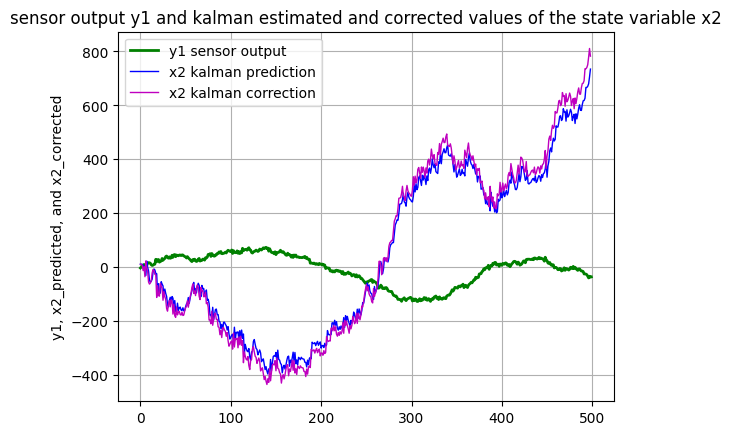

In [ ]:
# sense2 = np.array(sensor_output)[: , 0]
# X2 = [item[1] for item in Xpred]
# x2cor = [item[1] for item in Xpred_corrected]
# plt.plot(sense2, color = 'g', linewidth = '2', label = 'y1 sensor output')
# plt.plot(np.array(X2[0:499]), color = 'b', linewidth = '1', label = 'x2 kalman prediction')
# plt.plot(np.array(x2cor[0:499]), color = 'm', linewidth = '1', label = 'x2 kalman correction')
# plt.ylabel('y1, x2_predicted, and x2_corrected', fontsize = 10)
# plt.title('sensor output y1 and kalman estimated and corrected values of the state variable x2')
# plt.legend( fontsize = 10)
# plt.grid()

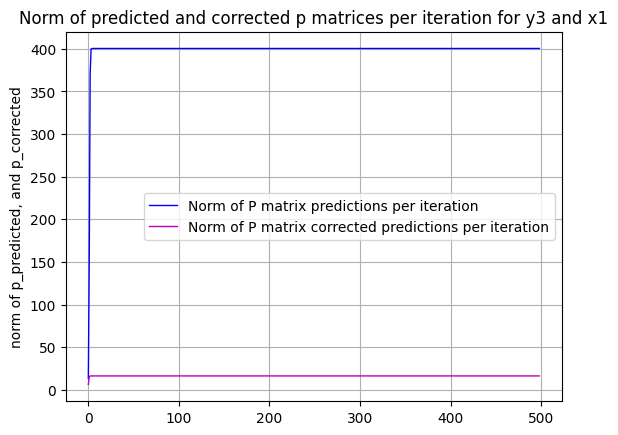

In [69]:
plt.plot(np.array(Ppred_norm) * 1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm)* 1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
plt.title('Norm of predicted and corrected p matrices per iteration for y3 and x1')
plt.legend( fontsize = 10)
plt.grid()

In [ ]:
# for i in range(num_of_iterations):
#   plt.plot(np.array(np.linalg.norm(Ppred[i])), color = 'b', linewidth = '1')
#   plt.plot(np.array(np.linalg.norm(Ppred_corrected[i])), color = 'm', linewidth = '1')

# plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
# plt.title('Norm of predicted and corrected p matrices per iteration for y2 and x1')
# #plt.legend( fontsize = 10)
# plt.grid()


##C) **for sensor y1 and state x2**

In [83]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)
rmse_pred2 = []
rmse_cor2 = []
## k ##
K = []
K02 = p0 @ C2.T @ np.linalg.inv((C2 @ p0 @ C2.T + R3))
K.append(K02) #K0i per state
 ## initialization ##
Xpred2 = discretize(x0, state_dynamics)
Xpred.append(Xpred2)
Ppred2 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred2))
K2 = Ppred2 @ C2.T @ np.linalg.inv((C2 @ Ppred2 @ C2.T + R1))
K.append(np.array([K2]))
Ppred_corrected2 = (np.identity(3) - K2 @ C2) @ Ppred2
Ppred_corrected.append(np.array(Ppred_corrected2))
Xpred_corrected2 = Xpred2 + K2 @ ((np.array(sensor_output)[0,2]) - C2 @Xpred2)
Xpred_corrected.append(Xpred_corrected2)


In [84]:
print("predicted X is", Xpred2)
print("Corrected X is", Xpred_corrected2)

predicted X is [10.2  9.9 10. ]
Corrected X is [10.2         1.0454261  36.04286442]


In [85]:
Ppred_old = Ppred_corrected2
Xpred_old = Xpred_corrected2
Ppred_norm = []
Ppred_corrected_norm = []
sense = np.array(sensor_output)[: , 2]
for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  #print(Ppred_new.shape)
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C2.T @ (np.linalg.inv((C2 @ Ppred_new @ C2.T + R3)))
  #print(K_new.shape)
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C2) @ Ppred_new
  #print(Ppred_corrected_new.shape)
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C2 @Xpred_new)
  #print(Xpred_corrected_new.shape)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm.append(np.linalg.norm(Ppred_corrected_new))
  rmse_pred = sense[k+1] - C2 @Xpred_new
  rmse_pred2.append(rmse_pred)
  rmse_cor = sense[k+1] - C2 @Xpred_corrected_new
  rmse_cor2.append(rmse_cor)
  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new

predicted X is [10.22090852  1.46028339 33.45857797] in iteration  0
Corrected X is [10.10216457  3.77875908 24.17280079] in iteration  0
Corrected Kalman gain is [[-0.0506714 ]
 [ 0.98935901]
 [-3.96250317]] in iteration  0
predicted X is [10.17773975  3.95915016 22.76573717] in iteration  1
Corrected X is [  9.89206835  11.83304738 -15.84552787] in iteration  1
Corrected Kalman gain is [[-0.03594526]
 [ 0.99075124]
 [-4.8583513 ]] in iteration  1
predicted X is [ 10.12872929  11.21937478 -13.27176825] in iteration  2
Corrected X is [10.39478234  5.60852631 13.73069426] in iteration  2
Corrected Kalman gain is [[-0.0469542 ]
 [ 0.9902269 ]
 [-4.76551184]] in iteration  2
predicted X is [10.50695287  5.57129672 13.39710306] in iteration  3
Corrected X is [10.603436    3.66516557 22.57166622] in iteration  3
Corrected Kalman gain is [[-0.05007738]
 [ 0.98933407]
 [-4.76184858]] in iteration  3
predicted X is [10.67673931  3.79849581 21.3748432 ] in iteration  4
Corrected X is [11.051141

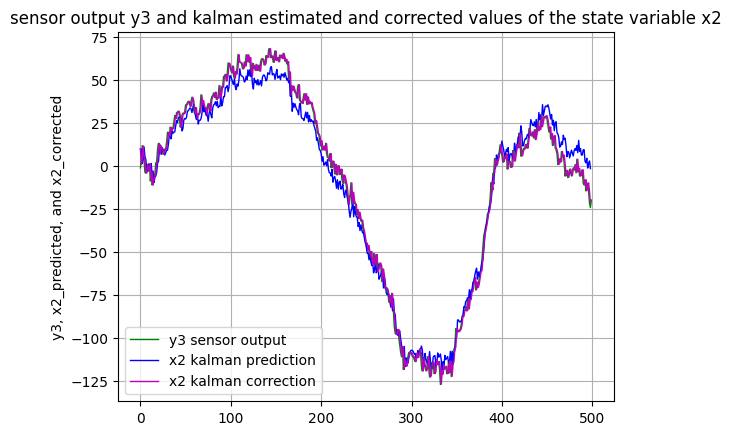

In [86]:
X2 = [item[1] for item in Xpred]
x2cor = [item[1] for item in Xpred_corrected]
plt.plot(sense, color = 'g', linewidth = '1', label = 'y3 sensor output')
plt.plot(np.array(X2[0:499]), color = 'b', linewidth = '1', label = 'x2 kalman prediction')
plt.plot(np.array(x2cor[0:499]), color = 'm', linewidth = '1', label = 'x2 kalman correction')
plt.ylabel('y3, x2_predicted, and x2_corrected', fontsize = 10)
plt.title('sensor output y3 and kalman estimated and corrected values of the state variable x2')
plt.legend( fontsize = 10)
plt.grid()

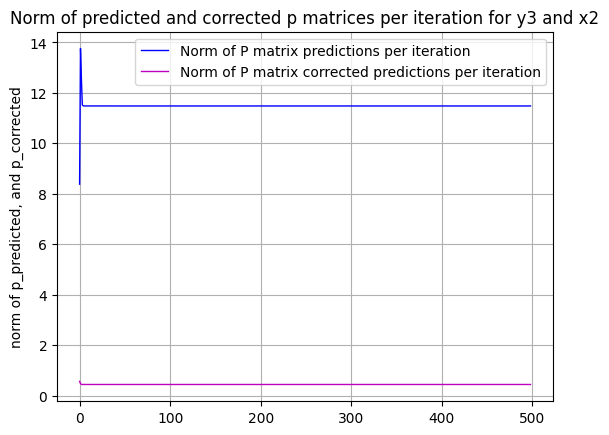

In [87]:
plt.plot(np.array(Ppred_norm)*1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm) *1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
plt.title('Norm of predicted and corrected p matrices per iteration for y3 and x2')
plt.legend( fontsize = 10)
plt.grid()

In [88]:
rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred2, 2)))
rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor2, 2)))
print("RMSE of Y3 and Estimated X2:", rmse_x1est_y1, "while RMSE of Y3 and Corrected X2:", rmse_x1cor_y1)

RMSE of Y3 and Estimated X2: 7.716543386496429 while RMSE of Y3 and Corrected X2: 0.0825895510294945


##C)**for sensor y1 and state x3**##

In [104]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)
rmse_pred3 = []
rmse_cor3 = []
## k ##
K = []
K03 = p0 @ C3.T @ np.linalg.inv((C3 @ p0 @ C3.T + R3))
K.append(K03) #K0i per state
 ## initialization ##
Xpred3 = discretize(x0, state_dynamics)
Xpred.append(Xpred3)
Ppred3 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred3))
K3 = Ppred3 @ C3.T @ np.linalg.inv((C3 @ Ppred3 @ C3.T + R2))
K.append(np.array([K3]))
Ppred_corrected3 = (np.identity(3) - K3 @ C3) @ Ppred3
Ppred_corrected.append(np.array(Ppred_corrected3))
Xpred_corrected3 = Xpred3 + K3 @ ((np.array(sensor_output)[0,2]) - C3 @Xpred3)
Xpred_corrected.append(Xpred_corrected3)

In [105]:
print("predicted X is", Xpred3)
print("Corrected X is", Xpred_corrected3)

predicted X is [10.2  9.9 10. ]
Corrected X is [10.2        12.60539291 -0.92978734]


In [106]:
Ppred_old = Ppred_corrected3
Xpred_old = Xpred_corrected3
Ppred_norm = []
Ppred_corrected_norm = []
sense = np.array(sensor_output)[: , 2]
for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  #print(Ppred_new.shape)
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C3.T @ (np.linalg.inv((C3 @ Ppred_new @ C3.T + R3)))
  #print(K_new.shape)
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C3) @ Ppred_new
  #print(Ppred_corrected_new.shape)
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C3 @Xpred_new)
  #print(Xpred_corrected_new.shape)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm.append(np.linalg.norm(Ppred_corrected_new))
  rmse_pred = sense[k+1] - C3 @Xpred_new
  rmse_pred3.append(rmse_pred)
  rmse_cor = sense[k+1] - C3 @Xpred_corrected_new
  rmse_cor3.append(rmse_cor)
  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new

predicted X is [10.45210786 12.28079716  0.1831914 ] in iteration  0
Corrected X is [10.45980071 11.21395197  3.79741794] in iteration  0
Corrected Kalman gain is [[ 0.0021248 ]
 [-0.2946676 ]
 [ 0.99826616]] in iteration  0
predicted X is [10.68407975 10.97610631  4.46365622] in iteration  1
Corrected X is [10.79637523  8.9122411  11.85186363] in iteration  1
Corrected Kalman gain is [[ 0.01508761]
 [-0.27729335]
 [ 0.99265241]] in iteration  1
predicted X is [10.97462006  8.82538711 11.74631479] in iteration  2
Corrected X is [10.88827758 10.54427941  5.59883345] in iteration  2
Corrected Kalman gain is [[ 0.01394158]
 [-0.27754666]
 [ 0.99262353]] in iteration  2
predicted X is [11.09916317 10.32960775  6.12777787] in iteration  3
Corrected X is [11.06464718 11.01828444  3.6630855 ] in iteration  3
Corrected Kalman gain is [[ 0.01390001]
 [-0.27733859]
 [ 0.99256199]] in iteration  3
predicted X is [11.28501287 10.75960674  4.40324167] in iteration  4
Corrected X is [11.17284619 12.

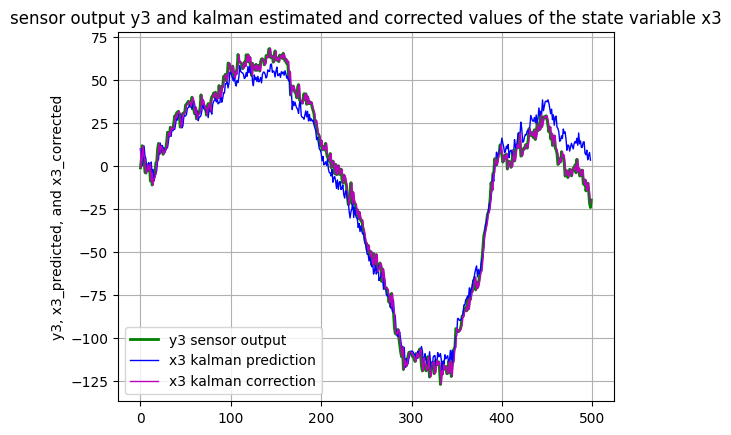

In [107]:
X3 = [item[2] for item in Xpred]
x3cor = [item[2] for item in Xpred_corrected]
plt.plot(sense, color = 'g', linewidth = '2', label = 'y3 sensor output')
plt.plot(np.array(X3[0:499]), color = 'b', linewidth = '1', label = 'x3 kalman prediction')
plt.plot(np.array(x3cor[0:499]), color = 'm', linewidth = '1', label = 'x3 kalman correction')
plt.ylabel('y3, x3_predicted, and x3_corrected', fontsize = 10)
plt.title('sensor output y3 and kalman estimated and corrected values of the state variable x3')
plt.legend( fontsize = 10)
plt.grid()

In [ ]:
np.linalg.norm(p0)

100.99504938362078

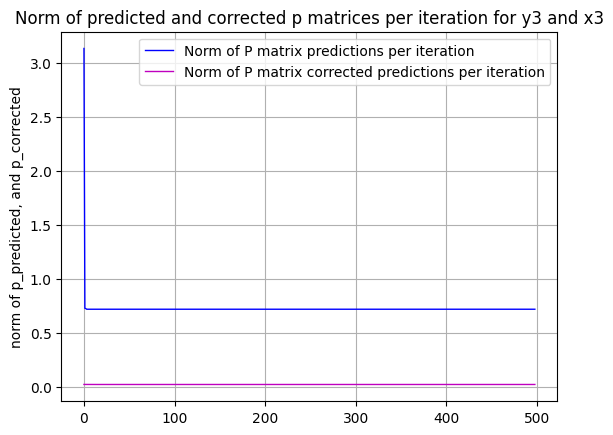

In [108]:
plt.plot(np.array(Ppred_norm)*1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm) *1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
plt.title('Norm of predicted and corrected p matrices per iteration for y3 and x3')
plt.legend( fontsize = 10)
plt.grid()

In [109]:
rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred3, 2)))
rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor3, 2)))
print("RMSE of Y3 and Estimated X2:", rmse_x1est_y1, "while RMSE of Y3 and Corrected X2:", rmse_x1cor_y1)

RMSE of Y3 and Estimated X2: 8.276129142520373 while RMSE of Y3 and Corrected X2: 0.061543558989310444


#**d)fusing the sensors**

###**y1 // y2**

In [61]:
##reminder:
#Rmeasure = np.diag([R1, R2, R3])
# K01 = p0 @ C1.T @ np.linalg.inv((C1 @ p0 @ C1.T + R1))
# K02 = p0 @ C2.T @ np.linalg.inv((C2 @ p0 @ C2.T + R2))
# K03 = p0 @ C3.T @ np.linalg.inv((C3 @ p0 @ C3.T + R3)

In [148]:
K012 = np.concatenate((K01, K02), axis = 1) #for fusion of y1 y2
K013 = np.concatenate((K01, K03), axis = 1) #for fusion of y1 y3
K023 = np.concatenate((K02, K03), axis = 1) #for fusion of y3 y2
K123 = np.concatenate((K01, K02, K03), axis = 1) #for fusion of y1 y2 y3

C12 = np.concatenate((C1, C2), axis = 0)
C13 = np.concatenate((C1, C3), axis = 0)
C23 = np.concatenate((C2, C3), axis = 0)
C123 = np.concatenate((C1, C2, C3), axis = 0)

R12 = np.diag([R1, R2])
R13 = np.diag([R1, R3])
R23 = np.diag([R2, R3])
R123 = np.diag([R1, R2, R3])

In [147]:
# np.concatenate((K01, K02, K03), axis = 1)

array([[0.66666667, 0.        , 0.        ],
       [0.        , 0.95238095, 0.        ],
       [0.        , 0.        , 0.66666667]])

In [149]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)
rmse_pred_x1 = []
rmse_pred_x2 = []
rmse_pred_x3 = []
rmse_cor_x1 = []
rmse_cor_x2 = []
rmse_cor_x3 = []
K = []
## y1//y2 ##
sense12 = np.append(np.array(sensor_output)[0,0], np.array(sensor_output)[0,1])
K.append(K012) #K0i per state
 ## initialization ##
Xpred12 = discretize(x0, state_dynamics)
Xpred.append(Xpred12)
Ppred12 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred12))
K12 = Ppred12 @ C12.T @ np.linalg.inv((C12 @ Ppred12 @ C12.T + R12))
K.append(np.array([K12]))
Ppred_corrected12 = (np.identity(3) - K12 @ C12) @ Ppred12
Ppred_corrected.append(np.array(Ppred_corrected12))
Xpred_corrected12 = Xpred12 + K12 @ (sense12 - C12 @Xpred12)
Xpred_corrected.append(Xpred_corrected12)
rmse_pred12_x1 = sense12[0] - (C12 @Xpred12)[0]
rmse_pred12_x2 = sense12[1] - (C12 @Xpred12)[1]
rmse_pred12_x3 = 0 - Xpred12[2]
rmse_pred_x1.append(rmse_pred12_x1)
rmse_pred_x2.append(rmse_pred12_x2)
rmse_pred_x3.append(rmse_pred12_x3)
rmse_cor12_x1 = sense12[0] - (C12 @Xpred_corrected12)[0]
rmse_cor12_x2 = sense12[1] - (C12 @Xpred_corrected12)[1]
rmse_cor12_x3 = 0 - Xpred_corrected12[2]
rmse_cor_x1.append(rmse_cor12_x1)
rmse_cor_x2.append(rmse_cor12_x2)
rmse_cor_x3.append(rmse_cor12_x3)



In [150]:
Ppred_old = Ppred_corrected12
Xpred_old = Xpred_corrected12
Ppred_norm12 = []
Ppred_corrected_norm12 = []
sense = np.stack((np.array(sensor_output)[:, 0], np.array(sensor_output)[:, 1]), axis = 1)

In [151]:
sense[0]

array([-3.86739675,  5.14284837])

In [152]:

for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C12.T @ (np.linalg.inv((C12 @ Ppred_new @ C12.T + R12)))
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C12) @ Ppred_new
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C12 @Xpred_new)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm12.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm12.append(np.linalg.norm(Ppred_corrected_new))

  # rmse_pred = sense[k+1] - C12 @Xpred_new
  # rmse_pred1.append(rmse_pred)
  # rmse_cor = sense[k+1] - C12 @Xpred_corrected_new
  # rmse_cor1.append(rmse_cor)

  rmse_pred12_x1 = sense[k, 0] - (C12 @Xpred_new)[0]
  rmse_pred12_x2 = sense[k, 1] - (C12 @Xpred_new)[1]
  rmse_pred12_x3 = 0 - Xpred_new[2]
  rmse_pred_x1.append(rmse_pred12_x1)
  rmse_pred_x2.append(rmse_pred12_x2)
  rmse_pred_x3.append(rmse_pred12_x3)
  rmse_cor12_x1 = sense[k, 0] - (C12 @Xpred_corrected_new)[0]
  rmse_cor12_x2 = sense[k, 1] - (C12 @Xpred_corrected_new)[1]
  rmse_cor12_x3 = 0 - Xpred_corrected_new[2]
  rmse_cor_x1.append(rmse_cor12_x1)
  rmse_cor_x2.append(rmse_cor12_x2)
  rmse_cor_x3.append(rmse_cor12_x3)

  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new

predicted X is [-2.58224166  6.17483098 19.9974267 ] in iteration  0
Corrected X is [-1.0876058  -0.90512082 52.91805821] in iteration  0
Corrected Kalman gain is [[ 0.57727049 -0.02627689]
 [-0.01313845  0.97556249]
 [ 0.28740351 -4.46542946]] in iteration  0
predicted X is [-1.10570822  0.18586852 47.51749181] in iteration  1
Corrected X is [ 1.80915286  3.38414828 32.94870212] in iteration  1
Corrected Kalman gain is [[ 0.57712939 -0.02350177]
 [-0.01175088  0.98679009]
 [ 0.22414246 -4.76286958]] in iteration  1
predicted X is [ 1.87683582  3.98884774 29.8347472 ] in iteration  2
Corrected X is [ 1.46136626  3.90271276 30.12486763] in iteration  2
Corrected Kalman gain is [[ 0.57610863 -0.02408344]
 [-0.01204172  0.98729814]
 [ 0.23170551 -4.76802006]] in iteration  2
predicted X is [ 1.53942051  4.46136912 27.25851749] in iteration  3
Corrected X is [ 5.84671102 10.52438607 -0.68229912] in iteration  3
Corrected Kalman gain is [[ 0.57610139 -0.02411481]
 [-0.0120574   0.9872918 ]


In [153]:
# rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred1, 2)))
# rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor1, 2)))
rmse_predx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x1, 2)))
rmse_corx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x1, 2)))
rmse_predx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x2, 2)))
rmse_corx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x2, 2)))
rmse_predx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x3, 2)))
rmse_corx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x3, 2)))

from prettytable import PrettyTable
table = PrettyTable(["RMSE of state i for sensors y1/y2", " Value of RMSE"])
table.add_row(["predicted state x1", rmse_predx1])
table.add_row(["corrected state x1", rmse_corx1])
table.add_row(["predicted state x2", rmse_predx2])
table.add_row(["corrected state x2", rmse_corx2])
table.add_row(["predicted state x3", rmse_predx3])
table.add_row(["corrected state x3", rmse_corx3])
print(table)


+-----------------------------------+--------------------+
| RMSE of state i for sensors y1/y2 |    Value of RMSE   |
+-----------------------------------+--------------------+
|         predicted state x1        | 2.3167999123515077 |
|         corrected state x1        | 3.556383761774429  |
|         predicted state x2        |  4.42876258438453  |
|         corrected state x2        | 4.542694997080404  |
|         predicted state x3        | 167.97112482223417 |
|         corrected state x3        | 188.10010310662477 |
+-----------------------------------+--------------------+


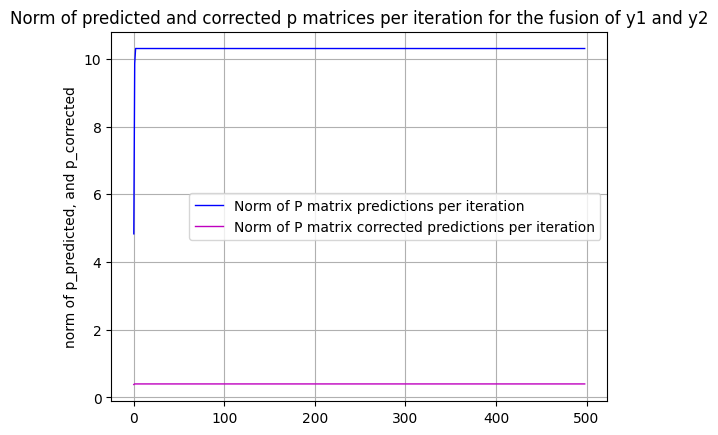

In [154]:
plt.plot(np.array(Ppred_norm12) * 1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm12)* 1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
plt.title('Norm of predicted and corrected p matrices per iteration for the fusion of y1 and y2')
plt.legend( fontsize = 10)
plt.grid()

###**y1/y3**

In [191]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)
rmse_pred_x1 = []
rmse_pred_x2 = []
rmse_pred_x3 = []
rmse_cor_x1 = []
rmse_cor_x2 = []
rmse_cor_x3 = []
K = []
## y1//y3 ##
sense13 = np.append(np.array(sensor_output)[0,0], np.array(sensor_output)[0,2])
K.append(K013) #K0i per state
 ## initialization ##
Xpred13 = discretize(x0, state_dynamics)
Xpred.append(Xpred13)
Ppred13 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred13))
K13 = Ppred13 @ C13.T @ np.linalg.inv((C13 @ Ppred13 @ C13.T + R13))
K.append(np.array([K13]))
Ppred_corrected13 = (np.identity(3) - K13 @ C13) @ Ppred13
Ppred_corrected.append(np.array(Ppred_corrected13))
Xpred_corrected13 = Xpred13 + K13 @ (sense13 - C13 @Xpred13)
Xpred_corrected.append(Xpred_corrected13)
rmse_pred12_x1 = sense13[0] - (C13 @Xpred13)[0]
rmse_pred12_x2 = 0 - Xpred13[1]
rmse_pred12_x3 = sense13[1] - (C13 @Xpred13)[1]
rmse_pred_x1.append(rmse_pred12_x1)
rmse_pred_x2.append(rmse_pred12_x2)
rmse_pred_x3.append(rmse_pred12_x3)
rmse_cor12_x1 = sense13[0] - (C13 @Xpred_corrected13)[0]
rmse_cor12_x2 = 0 - Xpred_corrected13[1]
rmse_cor12_x3 = sense13[1] - (C13 @Xpred_corrected13)[1]
rmse_cor_x1.append(rmse_cor12_x1)
rmse_cor_x2.append(rmse_cor12_x2)
rmse_cor_x3.append(rmse_cor12_x3)



In [192]:
Ppred_old = Ppred_corrected13
Xpred_old = Xpred_corrected13
Ppred_norm13 = []
Ppred_corrected_norm13 = []
sense = np.stack((np.array(sensor_output)[:, 0], np.array(sensor_output)[:, 2]), axis = 1)

In [193]:

for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C13.T @ (np.linalg.inv((C13 @ Ppred_new @ C13.T + R13)))
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C13) @ Ppred_new
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C13 @Xpred_new)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm13.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm13.append(np.linalg.norm(Ppred_corrected_new))

  # rmse_pred = sense[k+1] - C12 @Xpred_new
  # rmse_pred1.append(rmse_pred)
  # rmse_cor = sense[k+1] - C12 @Xpred_corrected_new
  # rmse_cor1.append(rmse_cor)

  rmse_pred13_x1 = sense[k, 0] - (C13 @Xpred_new)[0]
  rmse_pred13_x2 = 0 - Xpred_new[1]
  rmse_pred13_x3 = sense[k, 1] - (C13 @Xpred_new)[1]
  rmse_pred_x1.append(rmse_pred13_x1)
  rmse_pred_x2.append(rmse_pred13_x2)
  rmse_pred_x3.append(rmse_pred13_x3)
  rmse_cor13_x1 = sense[k, 0] - (C13 @Xpred_corrected_new)[0]
  rmse_cor13_x2 = 0 - Xpred_corrected_new[1]
  rmse_cor13_x3 = sense[k, 1] - (C13 @Xpred_corrected_new)[1]
  rmse_cor_x1.append(rmse_cor13_x1)
  rmse_cor_x2.append(rmse_cor13_x2)
  rmse_cor_x3.append(rmse_cor13_x3)

  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new

predicted X is [-2.44300583 12.66765057 -1.10631997] in iteration  0
Corrected X is [-0.96377777 11.42533944  3.74147028] in iteration  0
Corrected Kalman gain is [[ 0.68513157  0.00531585]
 [ 0.01111899 -0.25781873]
 [ 0.00265793  0.98617879]] in iteration  0
predicted X is [-0.73527098 11.52908218  3.27094547] in iteration  1
Corrected X is [ 2.60584811  9.41606808 11.78116765] in iteration  1
Corrected Kalman gain is [[ 0.68072163  0.00737206]
 [ 0.00932865 -0.24988735]
 [ 0.00368603  0.98342555]] in iteration  1
predicted X is [ 2.79416947  9.57351599 10.86363569] in iteration  2
Corrected X is [ 1.63997755 10.88475079  5.63584494] in iteration  2
Corrected Kalman gain is [[ 0.67961391  0.00713971]
 [ 0.00916227 -0.24974814]
 [ 0.00356986  0.9833238 ]] in iteration  2
predicted X is [ 1.85767257 10.94826837  5.23625821] in iteration  3
Corrected X is [ 6.88849152 11.41367803  3.69763983] in iteration  3
Corrected Kalman gain is [[ 0.67959497  0.00713307]
 [ 0.00916124 -0.24970368]


In [194]:
# rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred1, 2)))
# rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor1, 2)))
rmse_predx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x1, 2)))
rmse_corx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x1, 2)))
rmse_predx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x2, 2)))
rmse_corx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x2, 2)))
rmse_predx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x3, 2)))
rmse_corx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x3, 2)))

from prettytable import PrettyTable
table = PrettyTable(["RMSE of state i for sensors y1/y3", " Value of RMSE"])
table.add_row(["predicted state x1", rmse_predx1])
table.add_row(["corrected state x1", rmse_corx1])
table.add_row(["predicted state x2", rmse_predx2])
table.add_row(["corrected state x2", rmse_corx2])
table.add_row(["predicted state x3", rmse_predx3])
table.add_row(["corrected state x3", rmse_corx3])
print(table)


+-----------------------------------+--------------------+
| RMSE of state i for sensors y1/y3 |    Value of RMSE   |
+-----------------------------------+--------------------+
|         predicted state x1        | 2.074557158372602  |
|         corrected state x1        | 3.8936525550809193 |
|         predicted state x2        | 49.17689226994097  |
|         corrected state x2        | 49.178438218945296 |
|         predicted state x3        | 1.334350668440222  |
|         corrected state x3        | 4.124044928156996  |
+-----------------------------------+--------------------+


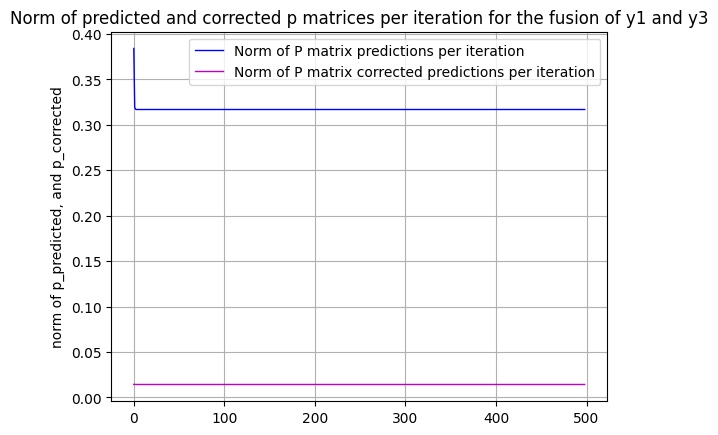

In [177]:
plt.plot(np.array(Ppred_norm13)* 1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm13)* 1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
#plt.xlim([0,50])
plt.title('Norm of predicted and corrected p matrices per iteration for the fusion of y1 and y3')
plt.legend(fontsize = 10)
plt.grid()

###**y2/y3**

In [196]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)
rmse_pred_x1 = []
rmse_pred_x2 = []
rmse_pred_x3 = []
rmse_cor_x1 = []
rmse_cor_x2 = []
rmse_cor_x3 = []
K = []
## y3//y2 ##
sense23 = np.append(np.array(sensor_output)[0,1], np.array(sensor_output)[0,2])
K.append(K023) #K0i per state
 ## initialization ##
Xpred23 = discretize(x0, state_dynamics)
Xpred.append(Xpred23)
Ppred23 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred23))
K23 = Ppred23 @ C23.T @ np.linalg.inv((C23 @ Ppred23 @ C23.T + R23))
K.append(np.array([K23]))
Ppred_corrected23 = (np.identity(3) - K23 @ C23) @ Ppred23
Ppred_corrected.append(np.array(Ppred_corrected23))
Xpred_corrected23 = Xpred23 + K23 @ (sense23 - C23 @Xpred23)
Xpred_corrected.append(Xpred_corrected23)
rmse_pred23_x1 = 0 - Xpred13[0]
rmse_pred23_x2 = sense23[0] - (C23 @Xpred23)[0]
rmse_pred23_x3 = sense23[1] - (C23 @Xpred23)[1]
rmse_pred_x1.append(rmse_pred23_x1)
rmse_pred_x2.append(rmse_pred23_x2)
rmse_pred_x3.append(rmse_pred23_x3)
rmse_cor23_x1 = 0 - Xpred_corrected23[0]
rmse_cor23_x2 = sense23[0] - (C23 @Xpred_corrected23)[0]
rmse_cor23_x3 = sense23[1] - (C23 @Xpred_corrected23)[1]
rmse_cor_x1.append(rmse_cor23_x1)
rmse_cor_x2.append(rmse_cor23_x2)
rmse_cor_x3.append(rmse_cor23_x3)


In [161]:
sense23

array([ 5.14284837, -1.03800305])

In [197]:
Ppred_old = Ppred_corrected23
Xpred_old = Xpred_corrected23
Ppred_norm23 = []
Ppred_corrected_norm23 = []
sense = np.stack((np.array(sensor_output)[:, 1], np.array(sensor_output)[:, 2]), axis = 1)

In [198]:

for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C23.T @ (np.linalg.inv((C23 @ Ppred_new @ C23.T + R23)))
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C23) @ Ppred_new
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C23 @Xpred_new)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm23.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm23.append(np.linalg.norm(Ppred_corrected_new))

  # rmse_pred = sense[k+1] - C12 @Xpred_new
  # rmse_pred1.append(rmse_pred)
  # rmse_cor = sense[k+1] - C12 @Xpred_corrected_new
  # rmse_cor1.append(rmse_cor)

  rmse_pred13_x1 = 0 - Xpred_new[0]
  rmse_pred13_x2 = sense[k, 0] - (C23 @Xpred_new)[0]
  rmse_pred13_x3 = sense[k, 1] - (C23 @Xpred_new)[1]
  rmse_pred_x1.append(rmse_pred13_x1)
  rmse_pred_x2.append(rmse_pred13_x2)
  rmse_pred_x3.append(rmse_pred13_x3)
  rmse_cor13_x1 = 0 - Xpred_corrected_new[0]
  rmse_cor13_x2 = sense[k, 0] - (C23 @Xpred_corrected_new)[0]
  rmse_cor13_x3 = sense[k, 1] - (C23 @Xpred_corrected_new)[1]
  rmse_cor_x1.append(rmse_cor13_x1)
  rmse_cor_x2.append(rmse_cor13_x2)
  rmse_cor_x3.append(rmse_cor13_x3)

  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new

predicted X is [10.34711159  7.04183057  0.67129387] in iteration  0
Corrected X is [10.2766342   1.05254361  4.41856425] in iteration  0
Corrected Kalman gain is [[ 0.01010407  0.0036086 ]
 [ 0.70650003 -0.0865064 ]
 [-0.0865064   0.97276786]] in iteration  0
predicted X is [10.29768507  0.83261587  5.00437124] in iteration  1
Corrected X is [10.37073966  2.13436921 11.47028337] in iteration  1
Corrected Kalman gain is [[ 0.00832045  0.00738241]
 [ 0.6993097  -0.08050758]
 [-0.08050758  0.96777365]] in iteration  1
predicted X is [10.41342705  2.05265268 11.360329  ] in iteration  2
Corrected X is [10.38804144  3.80720956  5.59239509] in iteration  2
Corrected Kalman gain is [[ 0.00781419  0.00684748]
 [ 0.69929706 -0.08055122]
 [-0.08055122  0.96771785]] in iteration  2
predicted X is [10.46418563  3.60741622  6.07195972] in iteration  3
Corrected X is [10.50314301  8.76042856  3.15201867] in iteration  3
Corrected Kalman gain is [[ 0.00783535  0.00683521]
 [ 0.69927535 -0.08053823]


In [199]:
# rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred1, 2)))
# rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor1, 2)))
rmse_predx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x1, 2)))
rmse_corx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x1, 2)))
rmse_predx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x2, 2)))
rmse_corx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x2, 2)))
rmse_predx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x3, 2)))
rmse_corx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x3, 2)))

from prettytable import PrettyTable
table = PrettyTable(["RMSE of state i for sensors y2/y3", " Value of RMSE"])
table.add_row(["predicted state x1", rmse_predx1])
table.add_row(["corrected state x1", rmse_corx1])
table.add_row(["predicted state x2", rmse_predx2])
table.add_row(["corrected state x2", rmse_corx2])
table.add_row(["predicted state x3", rmse_predx3])
table.add_row(["corrected state x3", rmse_corx3])
print(table)


+-----------------------------------+--------------------+
| RMSE of state i for sensors y2/y3 |    Value of RMSE   |
+-----------------------------------+--------------------+
|         predicted state x1        | 64.27696018968977  |
|         corrected state x1        | 64.27127756688039  |
|         predicted state x2        | 1.7252742183978294 |
|         corrected state x2        | 3.376374099801475  |
|         predicted state x3        | 2.585281542700535  |
|         corrected state x3        | 4.091177078044747  |
+-----------------------------------+--------------------+


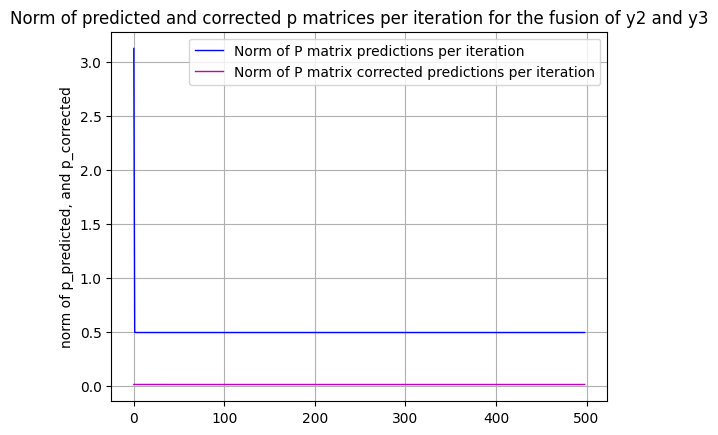

In [183]:
plt.plot(np.array(Ppred_norm23)* 1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm23)* 1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
plt.title('Norm of predicted and corrected p matrices per iteration for the fusion of y2 and y3')
plt.legend( fontsize = 10)
plt.grid()

###**y1 y2 y3**

In [136]:
###np.concatenate(np.array(sensor_output)[0,0], np.array(sensor_output)[0,1], np.array(sensor_output)[0,2])
# s = np.append(np.array(sensor_output)[0,0], np.array(sensor_output)[0,1])
# o = np.append(s, np.array(sensor_output)[0,2])
# o

array([-3.86739675,  5.14284837, -1.03800305])

In [202]:
Xpred = []
Xpred.append(x0)
Xpred_corrected = [] #estimations of x
Xpred_corrected.append(x0)
Ppred = []
Ppred.append(p0)
Ppred_corrected = []
Ppred_corrected.append(p0)
rmse_pred_x1 = []
rmse_pred_x2 = []
rmse_pred_x3 = []
rmse_cor_x1 = []
rmse_cor_x2 = []
rmse_cor_x3 = []
K = []
## y1//y3 ##
temp = np.append(np.array(sensor_output)[0,0], np.array(sensor_output)[0,1])
sense123 = np.append(temp, np.array(sensor_output)[0,2])
K.append(K123) #K0i per state
 ## initialization ##
Xpred123 = discretize(x0, state_dynamics)
Xpred.append(Xpred123)
Ppred123 = A @ p0  @A.T + Q
Ppred.append(np.array(Ppred123))
K0123 = Ppred123 @ C123.T @ np.linalg.inv((C123 @ Ppred123 @ C123.T + R123))
K.append(np.array([K0123]))
Ppred_corrected123 = (np.identity(3) - K123 @ C123) @ Ppred123
Ppred_corrected.append(np.array(Ppred_corrected123))
Xpred_corrected123 = Xpred123 + K123 @ (sense123 - C123 @Xpred123)
Xpred_corrected.append(Xpred_corrected123)
rmse_pred12_x1 = sense123[0] - (C123 @Xpred123)[0]
rmse_pred12_x2 = sense123[1] - (C123 @Xpred123)[1]
rmse_pred12_x3 = sense123[2] - (C123 @Xpred123)[2]
rmse_pred_x1.append(rmse_pred12_x1)
rmse_pred_x2.append(rmse_pred12_x2)
rmse_pred_x3.append(rmse_pred12_x3)
rmse_cor12_x1 = sense123[0] - (C123 @Xpred_corrected123)[0]
rmse_cor12_x2 = sense123[1] - (C123 @Xpred_corrected123)[1]
rmse_cor12_x3 = sense123[2] - (C123 @Xpred_corrected123)[2]
rmse_cor_x1.append(rmse_cor12_x1)
rmse_cor_x2.append(rmse_cor12_x2)
rmse_cor_x3.append(rmse_cor12_x3)


In [203]:
Ppred_old = Ppred_corrected123
Xpred_old = Xpred_corrected123
Ppred_norm123 = []
Ppred_corrected_norm123 = []
sense = np.stack((np.array(sensor_output)[:, 0], np.array(sensor_output)[:, 1], np.array(sensor_output)[:, 2]), axis = 1)

In [204]:

for k in range(num_of_iterations - 1):
  #omega1 = np.random.normal(0, 10, 1)
  Xpred_new = discretize(Xpred_old, state_dynamics)
  Xpred.append(np.array(Xpred_new))
  Ppred_new = A @ Ppred_old @ A.T + Q
  Ppred.append(np.array(Ppred_new))
  K_new = Ppred_new @ C123.T @ (np.linalg.inv((C123 @ Ppred_new @ C123.T + R123)))
  K.append(np.array(K_new))
  Ppred_corrected_new = (np.identity(3) - K_new @ C123) @ Ppred_new
  Xpred_corrected_new = Xpred_new + K_new @ ((sense[k+1]) - C123 @Xpred_new)
  Xpred_corrected.append(Xpred_corrected_new)
  Ppred_corrected.append(Ppred_corrected_new)
  Ppred_norm123.append(np.linalg.norm(Ppred_new))
  Ppred_corrected_norm123.append(np.linalg.norm(Ppred_corrected_new))

  # rmse_pred = sense[k+1] - C12 @Xpred_new
  # rmse_pred1.append(rmse_pred)
  # rmse_cor = sense[k+1] - C12 @Xpred_corrected_new
  # rmse_cor1.append(rmse_cor)

  rmse_pred13_x1 = sense[k, 0] - (C123 @Xpred_new)[0]
  rmse_pred13_x2 = sense[k, 1] - (C123 @Xpred_new)[1]
  rmse_pred13_x3 = sense[k, 2] - (C123 @Xpred_new)[2]
  rmse_pred_x1.append(rmse_pred13_x1)
  rmse_pred_x2.append(rmse_pred13_x2)
  rmse_pred_x3.append(rmse_pred13_x3)
  rmse_cor13_x1 = sense[k, 0] - (C123 @Xpred_corrected_new)[0]
  rmse_cor13_x2 = sense[k, 1] - (C123 @Xpred_corrected_new)[1]
  rmse_cor13_x3 = sense[k, 2] - (C123 @Xpred_corrected_new)[2]
  rmse_cor_x1.append(rmse_cor13_x1)
  rmse_cor_x2.append(rmse_cor13_x2)
  rmse_cor_x3.append(rmse_cor13_x3)

  print("predicted X is", Xpred_new ,"in iteration ", k)
  print("Corrected X is", Xpred_corrected_new ,"in iteration ", k)
  print("Corrected Kalman gain is", K_new ,"in iteration ", k)
  Xpred_old = Xpred_corrected_new
  Ppred_old = Ppred_corrected_new

predicted X is [0.92912309 5.39755396 2.45937172] in iteration  0
Corrected X is [0.21804162 0.2437344  4.07320984] in iteration  0
Corrected Kalman gain is [[ 0.51770354  0.01089733  0.00516509]
 [ 0.03814066  0.78175561 -0.04768089]
 [ 0.01807782 -0.04768089  0.98855274]] in iteration  0
predicted X is [0.2229163  0.31865734 3.68769301] in iteration  1
Corrected X is [ 2.49798922  1.90267886 11.36991826] in iteration  1
Corrected Kalman gain is [[ 5.81437822e-01 -1.66398817e-03  4.62801769e-03]
 [ 4.44829523e-04  6.92340723e-01 -7.45175641e-02]
 [ 1.29576706e-03 -7.40452426e-02  9.62658724e-01]] in iteration  1
predicted X is [ 2.5360428   2.05513755 10.48272535] in iteration  2
Corrected X is [1.72899178 3.69846773 5.593247  ] in iteration  2
Corrected Kalman gain is [[ 0.57353979  0.002188    0.00346267]
 [ 0.00113032  0.69297851 -0.0753538 ]
 [ 0.00168165 -0.07538169  0.96329331]] in iteration  2
predicted X is [1.80296113 3.75846292 5.20682148] in iteration  3
Corrected X is [6.0

In [170]:
np.array(rmse_pred_x1).size

500

In [205]:
# rmse_x1est_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred1, 2)))
# rmse_x1cor_y1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor1, 2)))
rmse_predx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x1, 2)))
rmse_corx1 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x1, 2)))
rmse_predx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x2, 2)))
rmse_corx2 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x2, 2)))
rmse_predx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_pred_x3, 2)))
rmse_corx3 = np.sqrt( 1/499 * np.sum(np.power(rmse_cor_x3, 2)))

from prettytable import PrettyTable
table = PrettyTable(["RMSE of state i for sensors y1/y2/y3", " Value of RMSE"])
table.add_row(["predicted state x1", rmse_predx1])
table.add_row(["corrected state x1", rmse_corx1])
table.add_row(["predicted state x2", rmse_predx2])
table.add_row(["corrected state x2", rmse_corx2])
table.add_row(["predicted state x3", rmse_predx3])
table.add_row(["corrected state x3", rmse_corx3])
print(table)


+--------------------------------------+--------------------+
| RMSE of state i for sensors y1/y2/y3 |    Value of RMSE   |
+--------------------------------------+--------------------+
|          predicted state x1          | 2.3692706296547916 |
|          corrected state x1          | 3.5834668670069685 |
|          predicted state x2          | 1.5151927752096783 |
|          corrected state x2          | 3.352913982986729  |
|          predicted state x3          | 1.3847765285955809 |
|          corrected state x3          | 4.076162749625683  |
+--------------------------------------+--------------------+


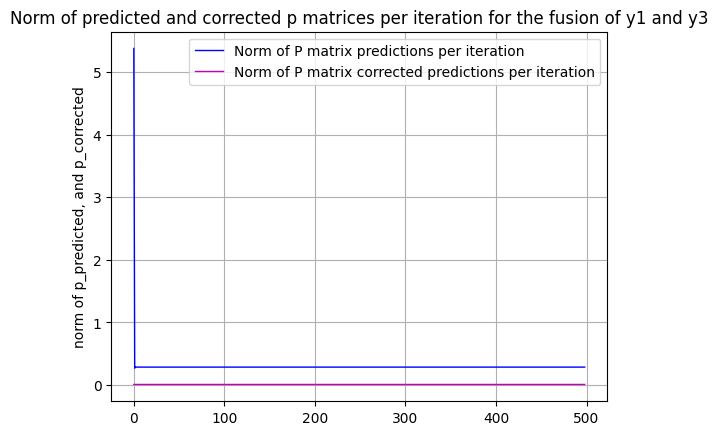

In [188]:
plt.plot(np.array(Ppred_norm123)* 1/1000, color = 'b', linewidth = '1', label = 'Norm of P matrix predictions per iteration')
plt.plot(np.array(Ppred_corrected_norm123)* 1/1000, color = 'm', linewidth = '1', label = 'Norm of P matrix corrected predictions per iteration')
plt.ylabel('norm of p_predicted, and p_corrected', fontsize = 10)
#plt.xlim([0,50])
plt.title('Norm of predicted and corrected p matrices per iteration for the fusion of y1 and y3')
plt.legend(fontsize = 10)
plt.grid()